In [11]:
target = "egfr"

docking_scores_chiral_filename = (
    f"/home/5/uq02055/bs/np-generation/generated/results_{target}_chiral.csv"
)
docking_scores_no_chiral_filename = (
    f"/home/5/uq02055/bs/np-generation/generated/results_{target}_no_chiral.csv"
)

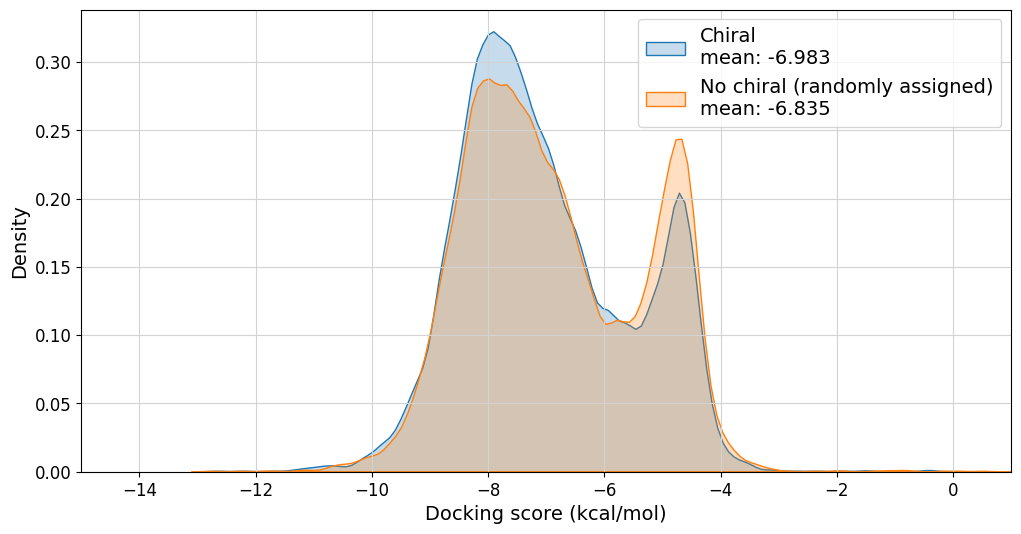

In [12]:
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt

docking_scores_chiral = pl.read_csv(docking_scores_chiral_filename)
docking_scores_no_chiral = pl.read_csv(docking_scores_no_chiral_filename)

docking_scores_chiral = docking_scores_chiral.filter(pl.col("docking_score") <= 10)
docking_scores_no_chiral = docking_scores_no_chiral.filter(
    pl.col("docking_score") <= 10
)

plt.figure(figsize=(12, 6))
# sns.histplot(docking_scores_chiral.to_pandas(), x="docking_score", kde=True, alpha=0.5)
# sns.histplot(docking_scores_no_chiral.to_pandas(), x="docking_score", kde=True, alpha=0.5)
sns.kdeplot(
    docking_scores_chiral["docking_score"].to_pandas(),
    label=f"Chiral\nmean: {docking_scores_chiral['docking_score'].mean():.3f}",
    bw_adjust=0.5,
    fill=True,
)
sns.kdeplot(
    docking_scores_no_chiral["docking_score"].to_pandas(),
    label=f"No chiral (randomly assigned)\nmean: {docking_scores_no_chiral['docking_score'].mean():.3f}",
    bw_adjust=0.5,
    fill=True,
)
plt.grid(color="lightgray")
plt.xlim(-15, 1)
plt.xlabel("Docking score (kcal/mol)", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.legend(fontsize=14)
# fontsize
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [13]:
# average, median
print(
    "Average docking score (chiral):",
    docking_scores_chiral["docking_score"].mean(),
)
print(
    "Average docking score (no chiral):",
    docking_scores_no_chiral["docking_score"].mean(),
)
average_diff = (
    docking_scores_chiral["docking_score"].mean()
    - docking_scores_no_chiral["docking_score"].mean()
)
print(
    "Average difference (percent):",
    average_diff / docking_scores_chiral["docking_score"].mean() * 100,
)

Average docking score (chiral): -6.983244444444443
Average docking score (no chiral): -6.834539301755811
Average difference (percent): 2.129456356163148


In [14]:
from rdkit import Chem
from rdkit.Chem import Draw, rdDepictor
import numpy as np

rdDepictor.SetPreferCoordGen(True)

docking_scores_chiral_high_score = docking_scores_chiral.filter(
    (pl.col("docking_score") > -10) & (pl.col("docking_score") < -7)
)
docking_scores_chiral_low_score = docking_scores_chiral.filter(
    (pl.col("docking_score") > -6) & (pl.col("docking_score") < -5)
)
docking_scores_no_chiral_high_score = docking_scores_no_chiral.filter(
    (pl.col("docking_score") > -10) & (pl.col("docking_score") < -7)
)
docking_scores_no_chiral_low_score = docking_scores_no_chiral.filter(
    (pl.col("docking_score") > -6) & (pl.col("docking_score") < -5)
)

smiles_chiral_high_score = docking_scores_chiral_high_score["smiles"].to_list()
smiles_chiral_low_score = docking_scores_chiral_low_score["smiles"].to_list()
smiles_no_chiral_high_score = docking_scores_no_chiral_high_score["smiles"].to_list()
smiles_no_chiral_low_score = docking_scores_no_chiral_low_score["smiles"].to_list()

mols_chiral_high_score = [Chem.MolFromSmiles(s) for s in smiles_chiral_high_score]
mols_chiral_low_score = [Chem.MolFromSmiles(s) for s in smiles_chiral_low_score]
mols_no_chiral_high_score = [Chem.MolFromSmiles(s) for s in smiles_no_chiral_high_score]
mols_no_chiral_low_score = [Chem.MolFromSmiles(s) for s in smiles_no_chiral_low_score]

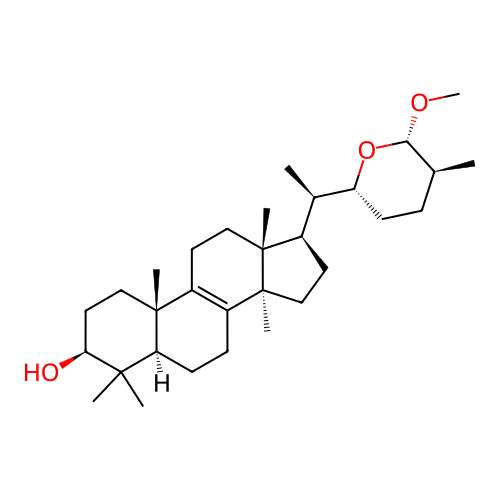

In [15]:
# Draw.MolsToGridImage(
#     np.random.choice(mols_chiral_high_score, 8), molsPerRow=4, subImgSize=(500, 500)
# )
Draw.MolToImage(np.random.choice(mols_chiral_high_score), size=(500, 500))

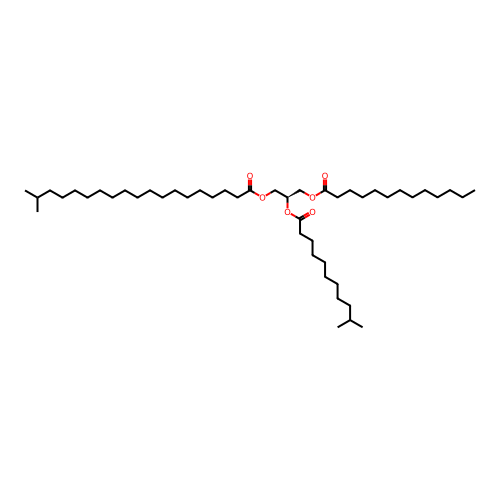

In [16]:
# Draw.MolsToGridImage(
#     np.random.choice(mols_chiral_low_score, 8), molsPerRow=4, subImgSize=(500, 500)
# )
Draw.MolToImage(np.random.choice(mols_chiral_low_score), size=(500, 500))

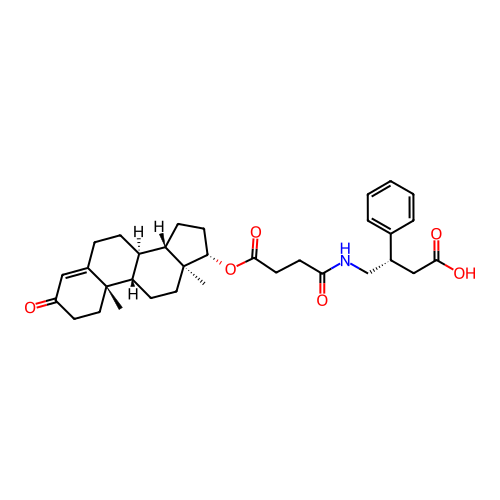

In [17]:
# Draw.MolsToGridImage(
#     np.random.choice(mols_no_chiral_high_score, 8), molsPerRow=4, subImgSize=(500, 500)
# )
Draw.MolToImage(np.random.choice(mols_no_chiral_high_score), size=(500, 500))

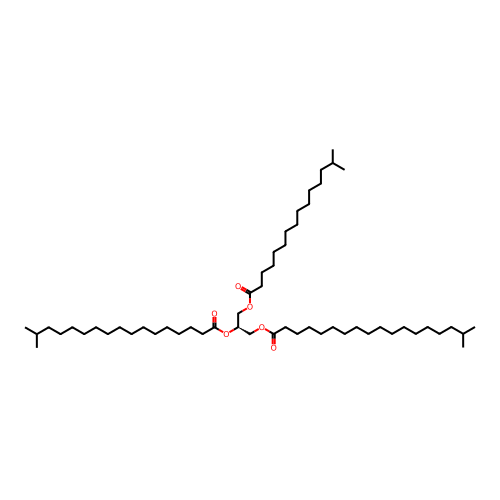

In [18]:
# Draw.MolsToGridImage(
#     np.random.choice(mols_no_chiral_low_score, 8), molsPerRow=4, subImgSize=(500, 500)
# )
Draw.MolToImage(np.random.choice(mols_no_chiral_low_score), size=(500, 500))

In [26]:
import py3Dmol

base_path = "/home/5/uq02055/fs/git/Vina_T4_Queue"
receptor_path = f"{base_path}/{target.upper()}/receptor.pdbqt"
file_paths_chiral_high_score = docking_scores_chiral_high_score["file_path"].to_list()
file_paths_chiral_low_score = docking_scores_chiral_low_score["file_path"].to_list()
file_paths_no_chiral_high_score = docking_scores_no_chiral_high_score[
    "file_path"
].to_list()
file_paths_no_chiral_low_score = docking_scores_no_chiral_low_score[
    "file_path"
].to_list()

In [58]:
view = py3Dmol.view(width=800, height=800)
view.addModel(
    open(f"{base_path}/{np.random.choice(file_paths_chiral_low_score)}", "r").read(),
    "pdb",
)
view.addModel(open(receptor_path, "r").read(), "pdb")
view.setStyle(
    {"model": 0},
    {"stick": {}},
)
view.setStyle(
    {"model": 1},
    {
        "cartoon": {"color": "lightblue"},
        "surface": {"opacity": 0.3},
    },
)
view.zoomTo()
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.